In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# We'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, 
# we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping 
# them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [50]:
# ^^^^^^^^^^^^
# The zip object packs each pair of lats and lngs having the same index 
# in their respective array into a tuple. If there are 1,500 latitudes 
# and longitudes, there will be 1,500 tuples of paired latitudes and 
# longitudes, where each latitude and longitude in a tuple can be accessed 
# by the index of 0 and 1, respectively.
### list(lat_lngs)    # <<<<<------ list unzips the tuple

# ^^^^^^^^^^^^

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)   # <<<<<------ list unzips the tuple

# You can only unzip a zipped tuple once before it is removed from the
# computer's memory. Make sure you unzip the latitudes and longitudes 
# into the coordinates list before moving on.

In [5]:
lat_lngs

In [6]:
coordinates[1499]

(82.49222603758653, 31.613102555272263)

In [7]:
coordinates[1499][0]

82.49222603758653

In [8]:
coordinates[1499][1]

31.613102555272263

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# The citipy module finds the nearest city to the latitude and longitude 
# pair with a population of 500 or more.
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [10]:
#cities

In [11]:
# import requests
# requests.__version__

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## ---> The code will return error as the index is a number and not the city name. The url created will not be good.
## Loop through all the cities in our list.
#for i in range(len(cities)):

#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
## <----    

# Lets's use Enumerate Method instead...
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#  OR     continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pasvalys
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | muli
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | bunia
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | radhanpur
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | monrovia
Processing Record 19 of Set 1 | yumen
Processing Record 20 of Set 1 | capao bonito
Processing Record 21 of Set 1 | soroc

Processing Record 38 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | chifeng
Processing Record 42 of Set 4 | antofagasta
Processing Record 43 of Set 4 | hima
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | hilton head island
Processing Record 46 of Set 4 | morehead
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | taungdwingyi
Processing Record 49 of Set 4 | uruguaiana
Processing Record 50 of Set 4 | beringovskiy
Processing Record 1 of Set 5 | coihaique
Processing Record 2 of Set 5 | todos santos
Processing Record 3 of Set 5 | logan
Processing Record 4 of Set 5 | rio gallegos
Processing Record 5 of Set 5 | comodoro rivadavia
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | vila do maio
Processing Record 9 of Set 5 | tabou
Processin

Processing Record 28 of Set 8 | banjar
Processing Record 29 of Set 8 | kodiak
Processing Record 30 of Set 8 | goundam
Processing Record 31 of Set 8 | naliya
Processing Record 32 of Set 8 | trairi
Processing Record 33 of Set 8 | virginia beach
Processing Record 34 of Set 8 | bababe
City not found. Skipping...
Processing Record 35 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 38 of Set 8 | el wasta
City not found. Skipping...
Processing Record 39 of Set 8 | mackenzie
Processing Record 40 of Set 8 | roald
Processing Record 41 of Set 8 | kainantu
Processing Record 42 of Set 8 | stoyba
City not found. Skipping...
Processing Record 43 of Set 8 | labuhan
Processing Record 44 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 45 of Set 8 | kolokani
Processing Record 46 of Set 8 | kashi
Processing Record 47 of Set 8 | plettenberg bay
Processi

Processing Record 14 of Set 12 | lafayette
Processing Record 15 of Set 12 | kuytun
Processing Record 16 of Set 12 | rafsanjan
Processing Record 17 of Set 12 | acajutla
Processing Record 18 of Set 12 | guilin
Processing Record 19 of Set 12 | gamba
Processing Record 20 of Set 12 | stettler
Processing Record 21 of Set 12 | merauke
Processing Record 22 of Set 12 | robertson
Processing Record 23 of Set 12 | pemangkat
Processing Record 24 of Set 12 | ust-nera
Processing Record 25 of Set 12 | springbok
Processing Record 26 of Set 12 | machesney park
Processing Record 27 of Set 12 | gisborne
Processing Record 28 of Set 12 | ayan
Processing Record 29 of Set 12 | san salvo
Processing Record 30 of Set 12 | luba
Processing Record 31 of Set 12 | hammerfest
Processing Record 32 of Set 12 | tsaratanana
Processing Record 33 of Set 12 | sao joao da barra
Processing Record 34 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 35 of Set 12 | tome-acu
City not found. Skipping...
Process

In [51]:
requests.get(city_url).json()

{'coord': {'lon': -1.256, 'lat': 51.7522},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 62.85,
  'feels_like': 63.16,
  'temp_min': 61.32,
  'temp_max': 64.38,
  'pressure': 1014,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 9.08, 'deg': 245, 'gust': 19.69},
 'clouds': {'all': 27},
 'dt': 1631318489,
 'sys': {'type': 2,
  'id': 2032458,
  'country': 'GB',
  'sunrise': 1631338414,
  'sunset': 1631385002},
 'timezone': 3600,
 'id': 2640729,
 'name': 'Oxford',
 'cod': 200}

In [13]:
len(city_data)

575

In [14]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pasvalys,56.0594,24.4036,56.52,82,9,7.20,LT,2021-09-10 22:07:00
1,Punta Arenas,-53.1500,-70.9167,42.91,56,20,27.63,CL,2021-09-10 22:03:36
2,Atuona,-9.8000,-139.0333,78.39,72,15,17.78,PF,2021-09-10 22:07:00
3,Severo-Kurilsk,50.6789,156.1250,49.03,58,37,21.32,RU,2021-09-10 22:07:00
4,Muli,2.9167,73.5667,82.54,71,90,3.76,MV,2021-09-10 22:07:01
...,...,...,...,...,...,...,...,...,...
570,Lesogorsk,56.0458,99.5136,39.54,83,35,2.89,RU,2021-09-10 22:09:31
571,Harper,4.3750,-7.7169,77.38,85,46,5.21,LR,2021-09-10 22:09:31
572,Laurel,39.0993,-76.8483,76.86,51,40,1.01,US,2021-09-10 22:07:00
573,Camargo,27.6667,-105.1667,89.74,13,0,10.60,MX,2021-09-10 22:09:31


In [15]:
# Reorder the columns
reorder_columns =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pasvalys,LT,2021-09-10 22:07:00,56.0594,24.4036,56.52,82,9,7.20
1,Punta Arenas,CL,2021-09-10 22:03:36,-53.1500,-70.9167,42.91,56,20,27.63
2,Atuona,PF,2021-09-10 22:07:00,-9.8000,-139.0333,78.39,72,15,17.78
3,Severo-Kurilsk,RU,2021-09-10 22:07:00,50.6789,156.1250,49.03,58,37,21.32
4,Muli,MV,2021-09-10 22:07:01,2.9167,73.5667,82.54,71,90,3.76
...,...,...,...,...,...,...,...,...,...
570,Lesogorsk,RU,2021-09-10 22:09:31,56.0458,99.5136,39.54,83,35,2.89
571,Harper,LR,2021-09-10 22:09:31,4.3750,-7.7169,77.38,85,46,5.21
572,Laurel,US,2021-09-10 22:07:00,39.0993,-76.8483,76.86,51,40,1.01
573,Camargo,MX,2021-09-10 22:09:31,27.6667,-105.1667,89.74,13,0,10.60


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

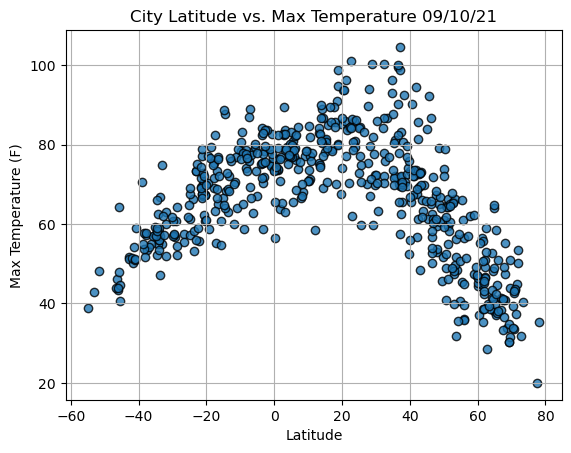

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

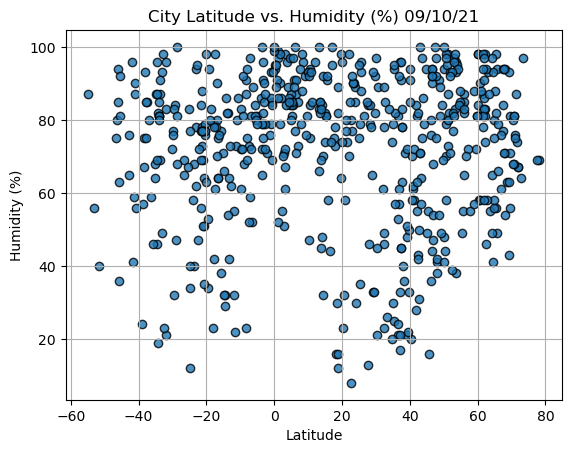

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

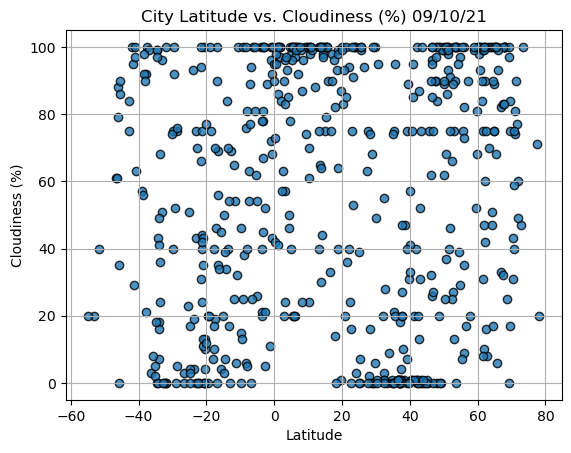

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

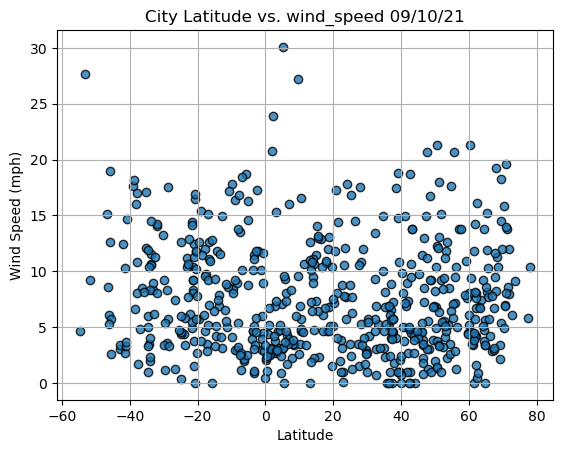

In [21]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

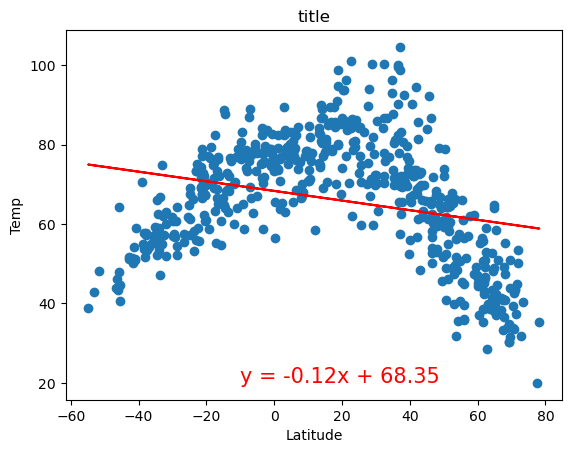

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-10,20), fontsize=15, color="red")
plt.title('title')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq += '\n'
    line_eq += "r-values: " + str(round(r_value,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# plot_linear_regression(lats, max_temps, "Latitude Vs. Max.Temperatures", 'Max.Temperatures', (-5,20))

In [25]:
city_data_df.loc[9]

City                      Mataura
Country                        NZ
Date          2021-09-10 22:07:02
Lat                      -46.1927
Lng                      168.8643
Max Temp                    43.48
Humidity                       94
Cloudiness                     88
Wind Speed                   6.11
Name: 9, dtype: object

In [26]:
city_data_df.loc[9]["City"]


'Mataura'

In [27]:
# Method 1
#southern_hemisphere = []
#i = 0
#for i in range(len(city_data_df)):
#    if city_data_df.loc[i]["Lat"] >= 0:
#        southern_hemisphere.append(city_data_df.loc[i])
#
#len(southern_hemisphere)        

In [28]:
#southern_hemisphere[9]

In [29]:
# Get Northern Hemisphere Data
northern_hemi_df =city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pasvalys,LT,2021-09-10 22:07:00,56.0594,24.4036,56.52,82,9,7.20
3,Severo-Kurilsk,RU,2021-09-10 22:07:00,50.6789,156.1250,49.03,58,37,21.32
4,Muli,MV,2021-09-10 22:07:01,2.9167,73.5667,82.54,71,90,3.76
5,Albany,US,2021-09-10 22:04:35,42.6001,-73.9662,69.28,50,13,1.01
7,Bunia,CD,2021-09-10 22:07:01,1.5667,30.2500,63.68,90,97,3.15


In [30]:
# Get Southern Hemisphere Data
southern_hemi_df =city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Punta Arenas,CL,2021-09-10 22:03:36,-53.1500,-70.9167,42.91,56,20,27.63
2,Atuona,PF,2021-09-10 22:07:00,-9.8000,-139.0333,78.39,72,15,17.78
6,Busselton,AU,2021-09-10 22:07:01,-33.6500,115.3333,47.08,87,36,11.52
8,Rikitea,PF,2021-09-10 22:07:02,-23.1203,-134.9692,73.42,78,43,11.23
9,Mataura,NZ,2021-09-10 22:07:02,-46.1927,168.8643,43.48,94,88,6.11


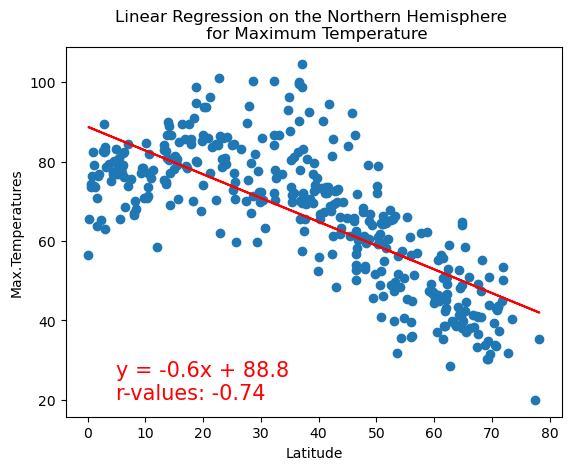

In [31]:
# Linear Regression on Northern Hemisphere for Max.Temp
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max.Temperatures', (5,20))

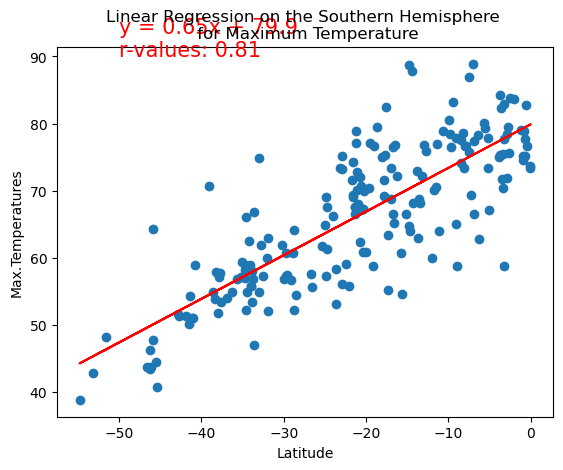

In [32]:
# Linear Regression on Southern Hemisphere for Max.Temp
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max.Temperatures', (-50,90))

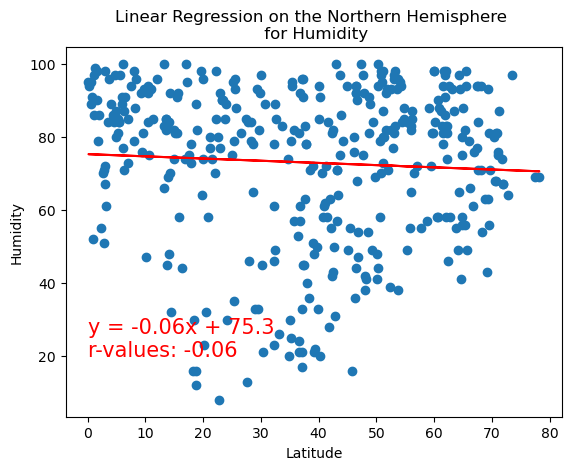

In [33]:
# Linear Regression on Northern Hemisphere for Humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       'Linear Regression on the Northern Hemisphere \n for Humidity', 
                       'Humidity', (0,20))

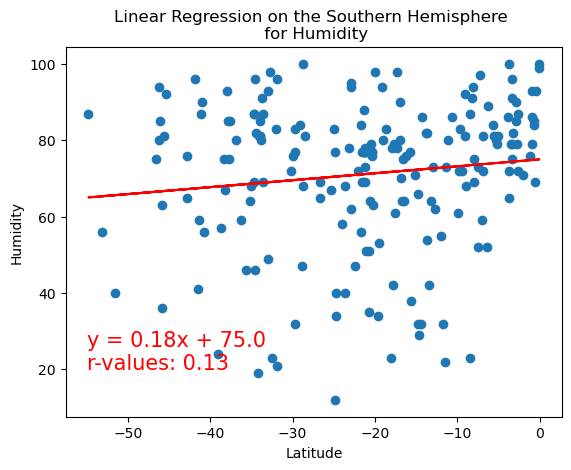

In [34]:
# Linear Regression on Southern Hemisphere for Humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       'Linear Regression on the Southern Hemisphere \n for Humidity', 
                       'Humidity', (-55,20))

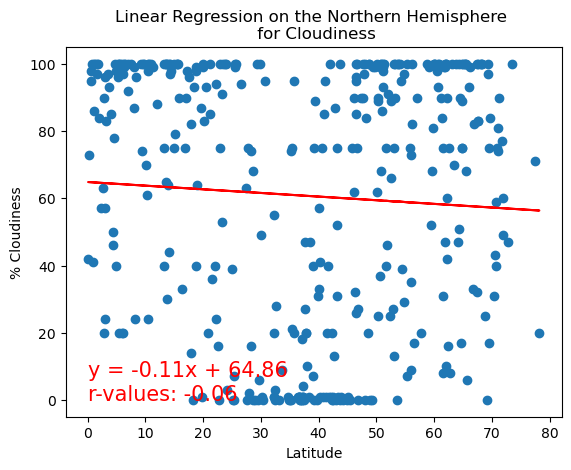

In [37]:
# Linear Regression on Northern Hemisphere for Cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 
                       '% Cloudiness', (0,0))

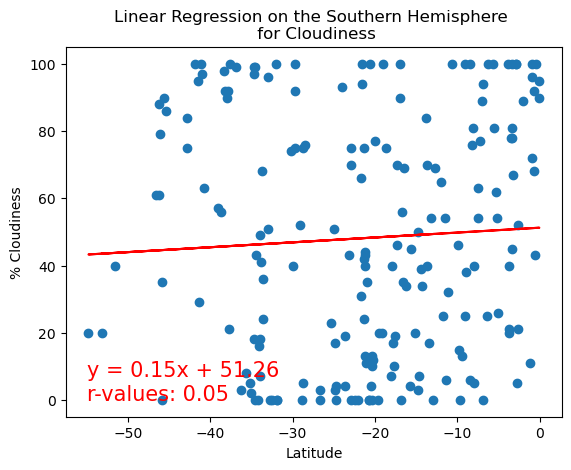

In [40]:
# Linear Regression on Southern Hemisphere for Cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', 
                       '% Cloudiness', (-55,0))

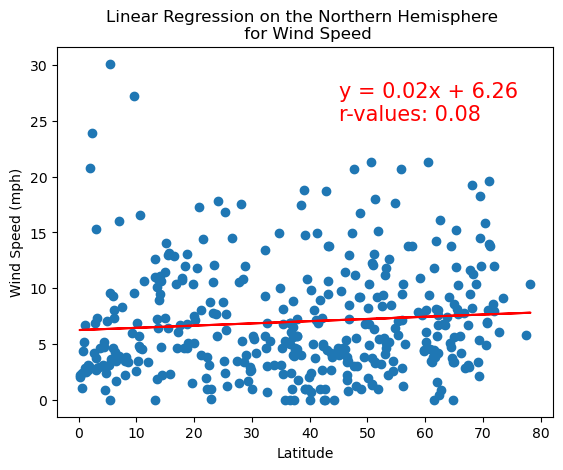

In [42]:
# Linear Regression on Northern Hemisphere for Wind Speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (45,25))

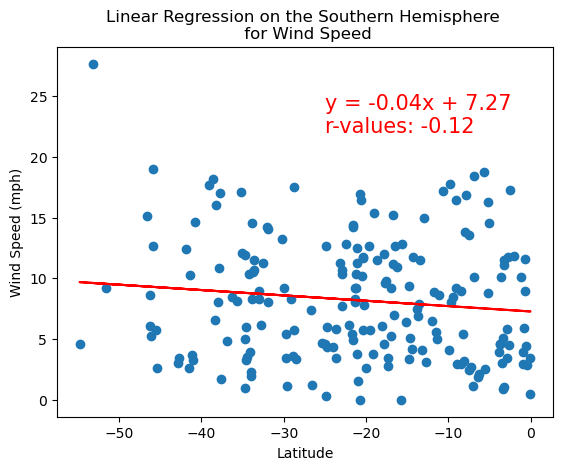

In [48]:
# Linear Regression on Southern Hemisphere for Wind Speed
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (-25,22))